# Lead Score Case Study:


### Problem Statement:
An education company named X Education sells online courses to industry professionals. The company now needs us to build a modelwhere we need to assign a lead score to each of leads such that a customer with higher lead score will have a higher conversion chance and customer having lower lead score will have a lower conversion chance. The CEO in particular has already given a target lead conversion rate to be 80%.

### Goals And Objectives:

There are quite a few goals for this case study.

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.


- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

In [1]:
#suppress the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics

### Reading the Dataset:

In [3]:
df_lead= pd.read_csv("Leads.csv")
df_lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
#checking the number of rows and columns 
df_lead.shape

(9240, 37)

In [5]:
# some basic information about the Dataset:
df_lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
#some summary statistic about the Dataset:
df_lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Data cleaning:


As we already know that the Dataset contains some  "select" values, this means they are null values.

In [7]:
# Converting all the values to lower case
df_lead = df_lead.applymap(lambda s:s.lower() if type(s) == str else s)

In [8]:
df_lead = df_lead.replace("select",np.nan)

In [9]:
# Dropping unique valued columns
df_lead= df_lead.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [10]:
df_lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 32 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### Handling Missing Values:

In [11]:
#missing value computation:
round(100*(df_lead.isnull().sum()/len(df_lead.index)),2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
A free cop

As we can see some of the columns have lots of missing values, this needs to be treated well.
Columns having higher percentage (40%) of missing values, needs to be dropped.

In [12]:
# dropping the columns having missing values of 40% or more
drop_col = df_lead.columns[round(100*(df_lead.isnull().sum()/len(df_lead)))>=40]
drop_col

Index(['How did you hear about X Education', 'Lead Quality', 'Lead Profile',
       'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
      dtype='object')

In [13]:
df_lead = df_lead.drop(drop_col,1)


In [14]:
df_lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [15]:
#dropping the column prospect id column
df_lead= df_lead.drop(["Prospect ID"],1)

                      

In [16]:
df_lead.shape

(9240, 23)

As we can see after dropping the columns the column numbers has been reduced. Rest of the columns having null values of less than 40% has to be imposed by some values.

#### Imposing the Missing Values:

In [17]:
# checking the specialization column
df_lead["Specialization"].value_counts()

finance management                   976
human resource management            848
marketing management                 838
operations management                503
business administration              403
it projects management               366
supply chain management              349
banking, investment and insurance    338
travel and tourism                   203
media and advertising                203
international business               178
healthcare management                159
hospitality management               114
e-commerce                           112
retail management                    100
rural and agribusiness                73
e-business                            57
services excellence                   40
Name: Specialization, dtype: int64

In [18]:
#replacing the missing values with "Finance Management"
df_lead["Specialization"]=df_lead["Specialization"].replace(np.nan, "Finance Management")

In [19]:
#checking the "what matters most to you in choosing a course" column
df_lead["What matters most to you in choosing a course"].value_counts()

better career prospects      6528
flexibility & convenience       2
other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [20]:
#replacing the missing values with "Better Career Prospects"
df_lead["What matters most to you in choosing a course"]=df_lead["What matters most to you in choosing a course"].replace(np.nan, "Better Career Prospects")

In [21]:
#checking "what is your current occupation" column
df_lead["What is your current occupation"].value_counts()

unemployed              5600
working professional     706
student                  210
other                     16
housewife                 10
businessman                8
Name: What is your current occupation, dtype: int64

In [22]:
##replacing the missing values with "Unemployed"
df_lead["What is your current occupation"]=df_lead["What is your current occupation"].replace(np.nan, "Unemployed")

In [23]:
#checking the country column
df_lead["Country"].value_counts()

india                   6492
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
hong kong                  7
bahrain                    7
oman                       6
france                     6
unknown                    5
south africa               4
nigeria                    4
germany                    4
kuwait                     4
canada                     4
sweden                     3
china                      2
asia/pacific region        2
uganda                     2
bangladesh                 2
italy                      2
belgium                    2
netherlands                2
ghana                      2
philippines                2
russia                     1
switzerland                1
vietnam                    1
denmark                    1
tanzania                   1
liberia                    1
malaysia      

In [24]:
##replacing the missing values with "India"
df_lead["Country"]=df_lead["Country"].replace(np.nan, "India")

In [25]:
#checking the Last activity column
df_lead["Last Activity"].value_counts()

email opened                    3437
sms sent                        2745
olark chat conversation          973
page visited on website          640
converted to lead                428
email bounced                    326
email link clicked               267
form submitted on website        116
unreachable                       93
unsubscribed                      61
had a phone conversation          30
approached upfront                 9
view in browser link clicked       6
email received                     2
email marked spam                  2
visited booth in tradeshow         1
resubscribed to emails             1
Name: Last Activity, dtype: int64

In [26]:
#replacing the missing values with "email opened"
df_lead["Last Activity"]=df_lead["Last Activity"].fillna("email opened")

In [27]:
#checking the "Lead Source" column
df_lead["Lead Source"].value_counts()

google               2873
direct traffic       2543
olark chat           1755
organic search       1154
reference             534
welingak website      142
referral sites        125
facebook               55
bing                    6
click2call              4
social media            2
live chat               2
press_release           2
pay per click ads       1
blog                    1
welearn                 1
welearnblog_home        1
youtubechannel          1
testone                 1
nc_edm                  1
Name: Lead Source, dtype: int64

In [28]:
#replacing the missing values with "Google"
df_lead["Lead Source"]=df_lead["Lead Source"].replace(np.nan, "Google")

In [29]:
# replacing the missing values of the numerical column with its median
df_lead["Page Views Per Visit"]=df_lead["Page Views Per Visit"].fillna(df_lead["Page Views Per Visit"].median())
df_lead["TotalVisits"]=df_lead["TotalVisits"].fillna(df_lead["TotalVisits"].median())

In [30]:
# dropping the "tags" column
df_lead=df_lead.drop("Tags",1)

In [31]:
#rechecking the null values
round(100*(df_lead.isnull().sum()/len(df_lead.index)),2).sort_values(ascending=False)

Lead Number                                      0.0
Lead Origin                                      0.0
A free copy of Mastering The Interview           0.0
Through Recommendations                          0.0
Digital Advertisement                            0.0
Newspaper                                        0.0
X Education Forums                               0.0
Newspaper Article                                0.0
Search                                           0.0
What matters most to you in choosing a course    0.0
What is your current occupation                  0.0
Specialization                                   0.0
Country                                          0.0
Last Activity                                    0.0
Page Views Per Visit                             0.0
Total Time Spent on Website                      0.0
TotalVisits                                      0.0
Converted                                        0.0
Do Not Call                                   

All the missing values have been imputed corectly, and there are no such nulls present in the dataset.


In [32]:
#making the lead number as index and dropping the propect id  column
df_lead=df_lead.set_index("Lead Number")


In [33]:
df_lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,India,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
660728,api,organic search,no,no,0,5.0,674,2.5,email opened,india,...,unemployed,better career prospects,no,no,no,no,no,no,no,email opened
660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,india,...,student,better career prospects,no,no,no,no,no,no,yes,email opened
660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,india,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
660681,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,india,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified


# EDA

## Univariate Analysis

### Categorical variables

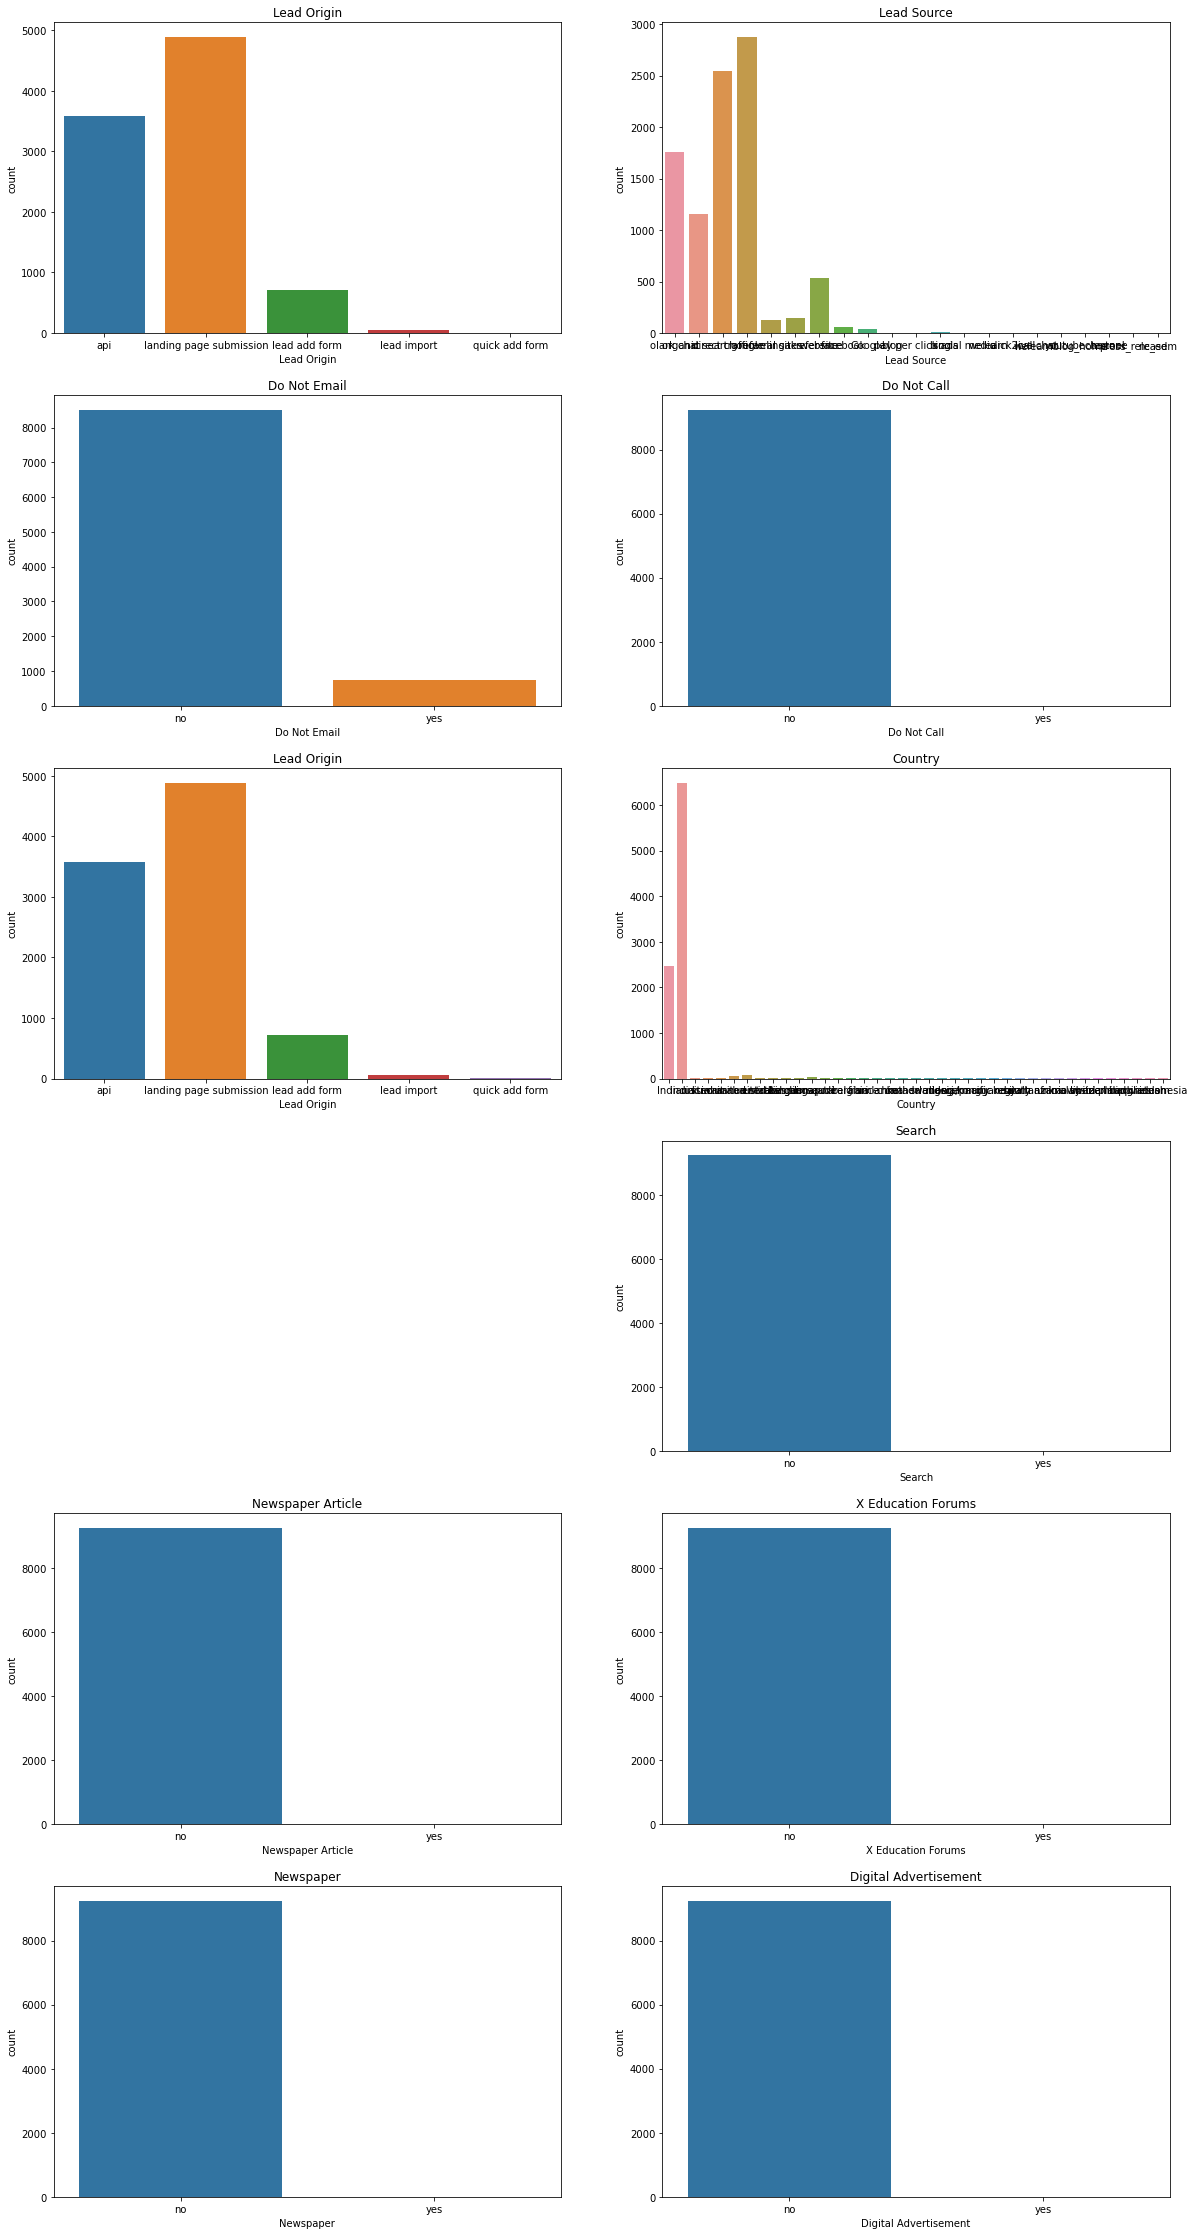

In [34]:
#plotting the categorical variables
plt.figure(figsize = (20,40))
plt.subplot(6,2,1)
sns.countplot(df_lead["Lead Origin"])
plt.title("Lead Origin")

plt.subplot(6,2,2)
sns.countplot(df_lead["Lead Source"])
plt.title("Lead Source")

plt.subplot(6,2,3)
sns.countplot(df_lead["Do Not Email"])
plt.title("Do Not Email")

plt.subplot(6,2,4)
sns.countplot(df_lead["Do Not Call"])
plt.title("Do Not Call")

plt.subplot(6,2,5)
sns.countplot(df_lead["Lead Origin"])
plt.title("Lead Origin")

plt.subplot(6,2,6)
sns.countplot(df_lead["Country"])
plt.title("Country")

plt.subplot(6,2,8)
sns.countplot(df_lead["Search"])
plt.title("Search")

plt.subplot(6,2,9)
sns.countplot(df_lead["Newspaper Article"])
plt.title("Newspaper Article")

plt.subplot(6,2,10)
sns.countplot(df_lead["X Education Forums"])
plt.title("X Education Forums")

plt.subplot(6,2,11)
sns.countplot(df_lead["Newspaper"])
plt.title("Newspaper")

plt.subplot(6,2,12)
sns.countplot(df_lead["Digital Advertisement"])
plt.title("Digital Advertisement")

plt.show()

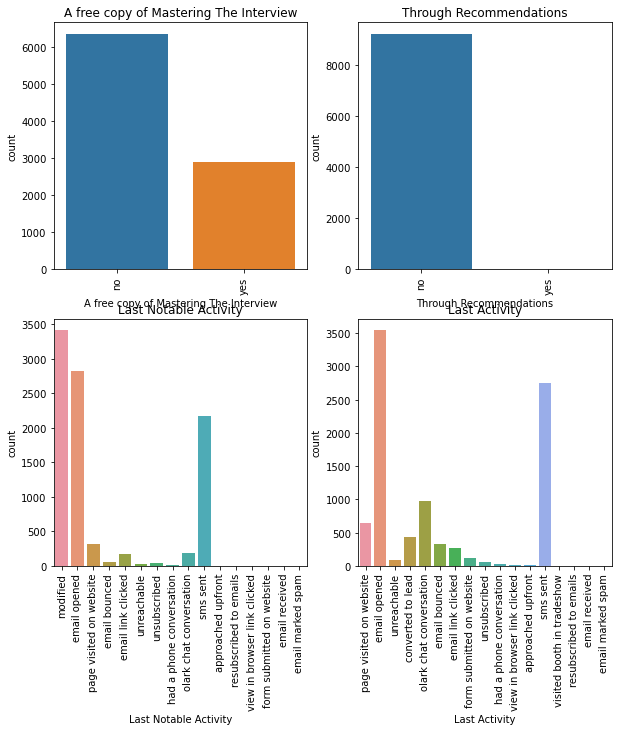

In [35]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.countplot(df_lead["A free copy of Mastering The Interview"]).tick_params(axis="x",rotation = 90)
plt.title("A free copy of Mastering The Interview")

plt.subplot(2,2,2)
sns.countplot(df_lead["Through Recommendations"]).tick_params(axis="x",rotation = 90)
plt.title("Through Recommendations")

plt.subplot(2,2,3)
sns.countplot(df_lead["Last Notable Activity"]).tick_params(axis="x",rotation = 90)
plt.title("Last Notable Activity")

plt.subplot(2,2,4)
sns.countplot(df_lead["Last Activity"]).tick_params(axis="x",rotation = 90)
plt.title("Last Activity")


plt.show()

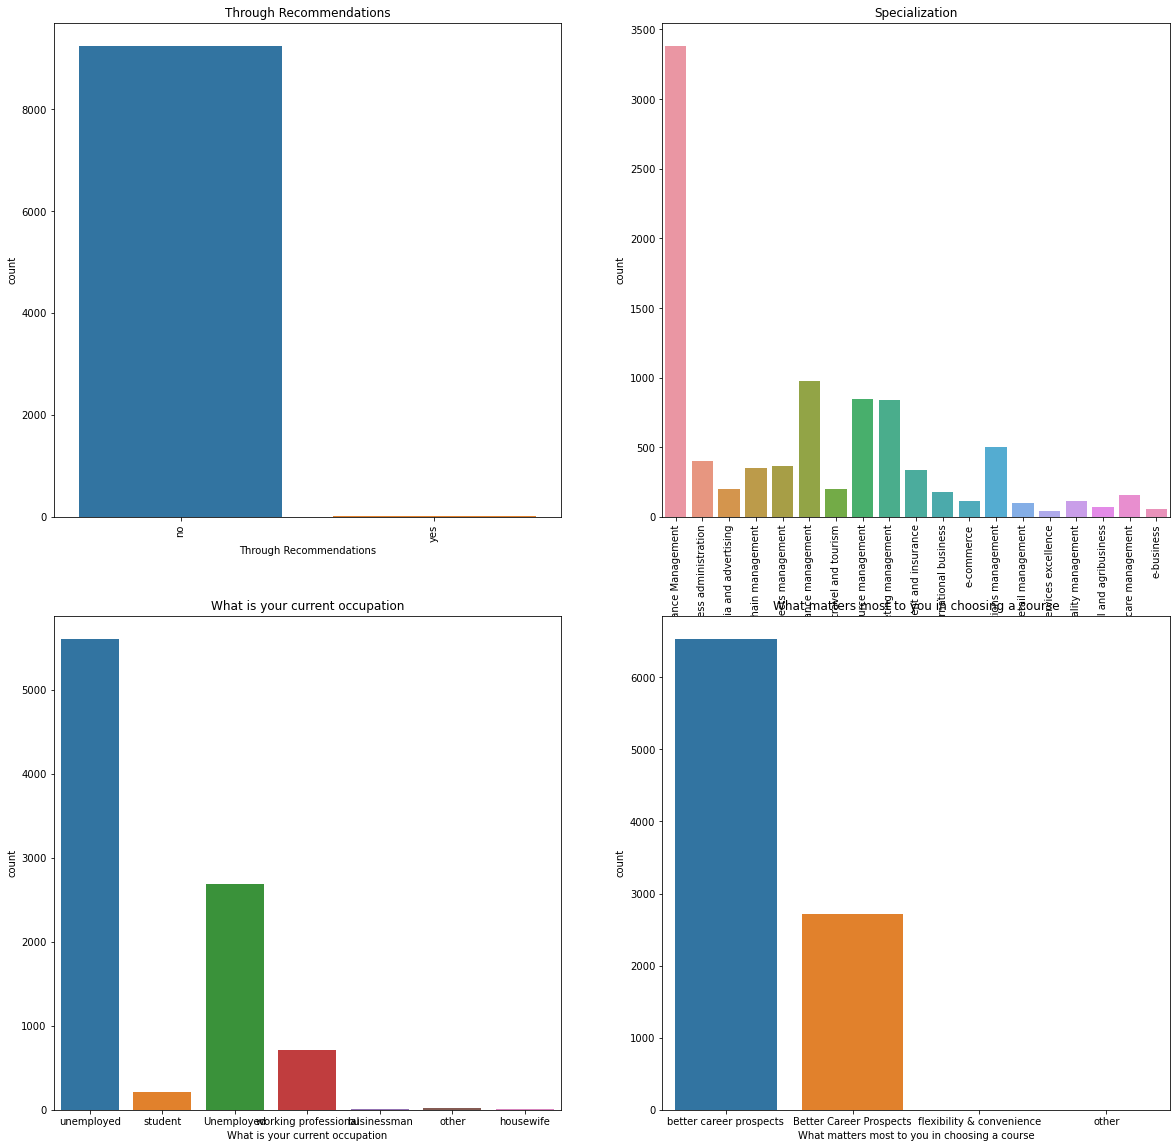

In [36]:
plt.figure(figsize = (20,20))
plt.subplot(2,2,1)
sns.countplot(df_lead["Through Recommendations"]).tick_params(axis="x",rotation = 90)
plt.title("Through Recommendations")

plt.subplot(2,2,2)
sns.countplot(df_lead["Specialization"]).tick_params(axis="x",rotation = 90)
plt.title("Specialization")

plt.subplot(2,2,3)
sns.countplot(df_lead["What is your current occupation"])
plt.title("What is your current occupation")

plt.subplot(2,2,4)
sns.countplot(df_lead["What matters most to you in choosing a course"])
plt.title("What matters most to you in choosing a course")
 
plt.show()

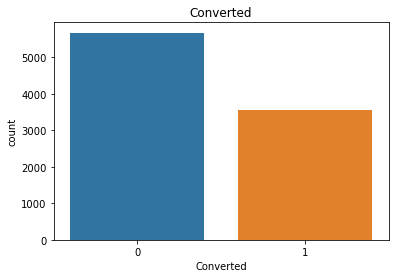

In [37]:
sns.countplot(df_lead["Converted"])
plt.title("Converted")
plt.show()

### Numerical Variables:

In [38]:
df_lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 660737 to 579533
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                      

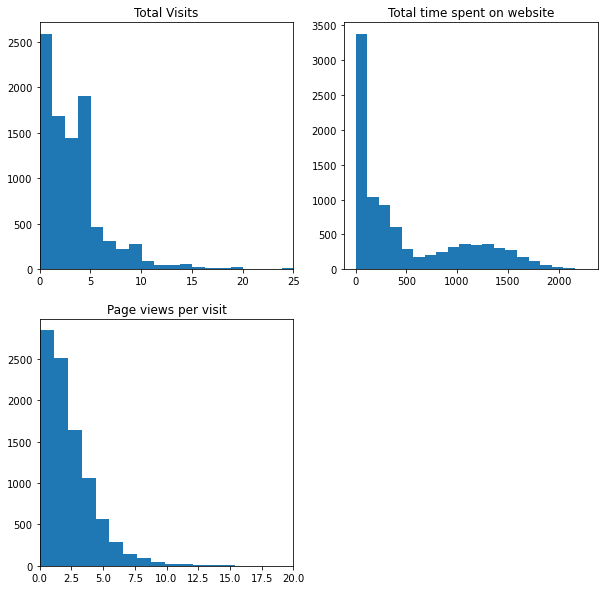

In [39]:
#plotting the numerical variables
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.hist(df_lead["TotalVisits"], bins =200)
plt.xlim(0,25)
plt.title("Total Visits")

plt.subplot(2,2,2)
plt.hist(df_lead["Total Time Spent on Website"], bins =20)
plt.title("Total time spent on website")


plt.subplot(2,2,3)
plt.hist(df_lead["Page Views Per Visit"], bins =50)
plt.xlim(0,20)
plt.title("Page views per visit")
plt.show()


### Bivariate Analysis

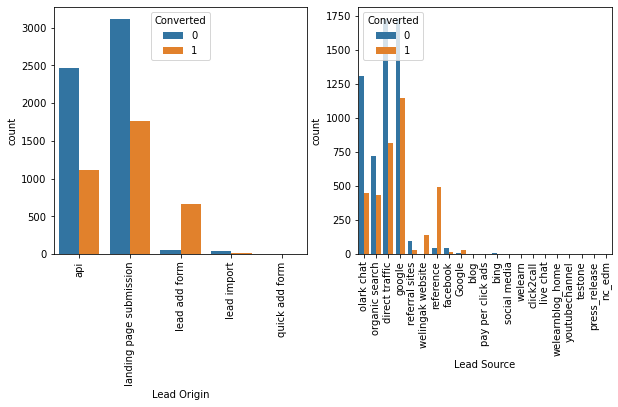

In [40]:
#plotting the categorical variables with the Target variable "Converted"
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.countplot(x= "Lead Origin", hue = "Converted", data = df_lead).tick_params(axis="x", rotation = 90)

plt.subplot(2,2,2)
sns.countplot(x= "Lead Source", hue = "Converted", data = df_lead).tick_params(axis="x", rotation = 90)

plt.show()

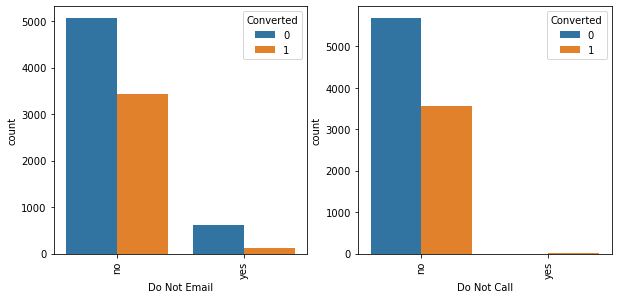

In [41]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.countplot(x= "Do Not Email", hue = "Converted", data = df_lead).tick_params(axis="x", rotation = 90)

plt.subplot(2,2,2)
sns.countplot(x= "Do Not Call", hue = "Converted", data = df_lead).tick_params(axis="x", rotation = 90)

plt.show()

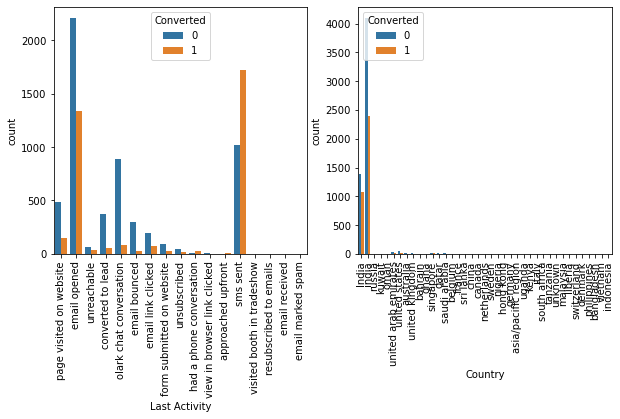

In [42]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.countplot(x= "Last Activity", hue = "Converted", data = df_lead).tick_params(axis="x", rotation = 90)

plt.subplot(2,2,2)
sns.countplot(x= "Country", hue = "Converted", data = df_lead).tick_params(axis="x", rotation = 90)

plt.show()

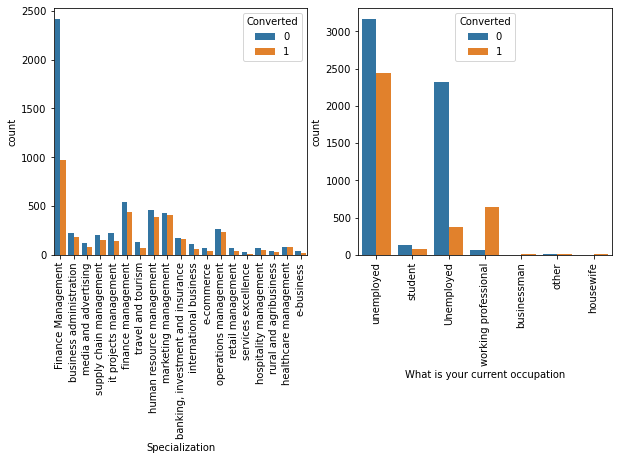

In [43]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.countplot(x= "Specialization", hue = "Converted", data = df_lead).tick_params(axis="x", rotation = 90)

plt.subplot(2,2,2)
sns.countplot(x= "What is your current occupation", hue = "Converted", data = df_lead).tick_params(axis="x", rotation = 90)

plt.show()

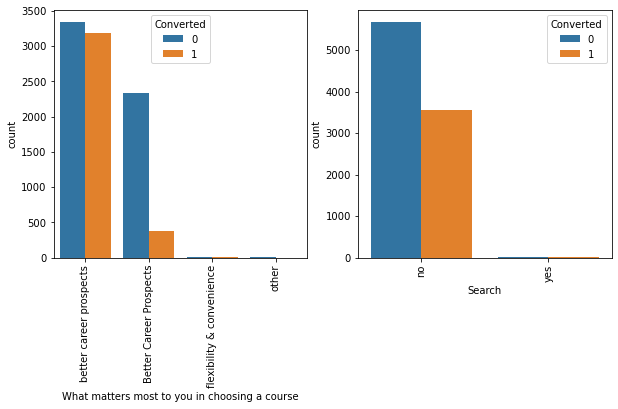

In [44]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.countplot(x= "What matters most to you in choosing a course", hue = "Converted", data = df_lead).tick_params(axis="x", rotation = 90)

plt.subplot(2,2,2)
sns.countplot(x= "Search", hue = "Converted", data = df_lead).tick_params(axis="x", rotation = 90)

plt.show()

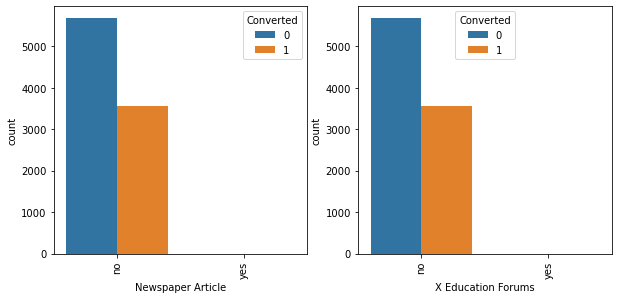

In [45]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.countplot(x= "Newspaper Article", hue = "Converted", data = df_lead).tick_params(axis="x", rotation = 90)

plt.subplot(2,2,2)
sns.countplot(x= "X Education Forums", hue = "Converted", data = df_lead).tick_params(axis="x", rotation = 90)

plt.show()

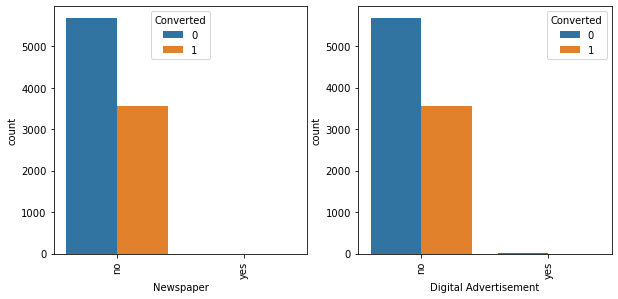

In [46]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.countplot(x= "Newspaper", hue = "Converted", data = df_lead).tick_params(axis="x", rotation = 90)

plt.subplot(2,2,2)
sns.countplot(x= "Digital Advertisement", hue = "Converted", data = df_lead).tick_params(axis="x", rotation = 90)

plt.show()

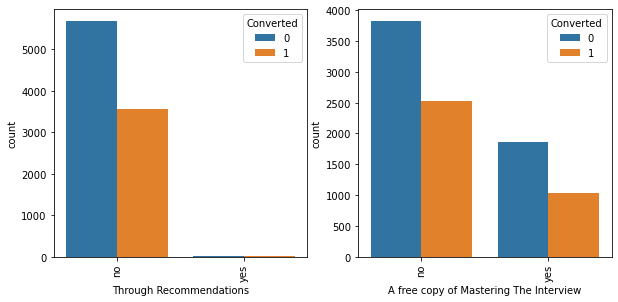

In [47]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.countplot(x= "Through Recommendations", hue = "Converted", data = df_lead).tick_params(axis="x", rotation = 90)

plt.subplot(2,2,2)
sns.countplot(x= "A free copy of Mastering The Interview", hue = "Converted", data = df_lead).tick_params(axis="x", rotation = 90)

plt.show()

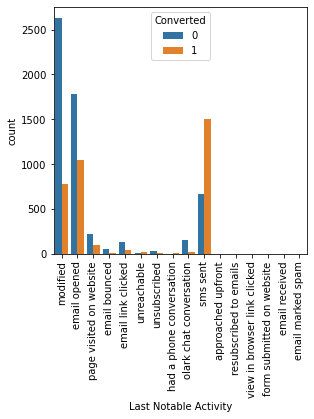

In [48]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.countplot(x= "Last Notable Activity", hue = "Converted", data = df_lead).tick_params(axis="x", rotation = 90)

plt.show()

In [49]:
# checking the outliers
num = df_lead[["TotalVisits", "Page Views Per Visit","Total Time Spent on Website"]]
num.describe(percentiles=[0.25,0.5,0.75,0.99])

,TotalVisits,Page Views Per Visit,Total Time Spent on Website
count,9240.000000,9240.000000,9240.000000
mean,3.438636,2.357440,487.698268
std,4.819024,2.145781,548.021466
min,0.000000,0.000000,0.000000
25%,1.000000,1.000000,12.000000
50%,3.000000,2.000000,248.000000
75%,5.000000,3.000000,936.000000
99%,17.000000,9.000000,1840.610000
max,251.000000,55.000000,2272.000000


From the above EDA we can interpret that there are mnany such variables whicch are less relevant for the analysi, and also we can say that there are no such outliers so we can move forward to the analysis.

### Dummy Variables

In [50]:
df_lead.shape

(9240, 21)

In [51]:
#finding the object columns
df_lead.loc[:, df_lead.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [52]:
# Create dummy variables using the 'get_dummies'
dummies = pd.get_dummies(df_lead[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity',]], drop_first=True)
# Add the results to the master dataframe
lead_dum = pd.concat([df_lead, dummies], axis=1)
lead_dum

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,api,olark chat,no,no,0,0.0,0,0.00,page visited on website,India,...,0,0,1,0,0,0,0,0,0,0
660728,api,organic search,no,no,0,5.0,674,2.50,email opened,india,...,0,0,0,0,0,0,0,0,0,0
660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.00,email opened,india,...,0,0,0,0,0,0,0,0,0,0
660719,landing page submission,direct traffic,no,no,0,1.0,305,1.00,unreachable,india,...,0,0,1,0,0,0,0,0,0,0
660681,landing page submission,google,no,no,1,2.0,1428,1.00,converted to lead,india,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579564,landing page submission,direct traffic,yes,no,1,8.0,1845,2.67,email marked spam,saudi arabia,...,0,0,0,0,0,0,0,0,0,0
579546,landing page submission,direct traffic,no,no,0,2.0,238,2.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0
579545,landing page submission,direct traffic,yes,no,0,2.0,199,2.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0


In [53]:
lead_dum = lead_dum.drop(['What is your current occupation','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'],1)


In [54]:
lead_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 660737 to 579533
Data columns (total 85 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             9240 non-null   int64  
 1   TotalVisits                                           9240 non-null   float64
 2   Total Time Spent on Website                           9240 non-null   int64  
 3   Page Views Per Visit                                  9240 non-null   float64
 4   Lead Origin_landing page submission                   9240 non-null   uint8  
 5   Lead Origin_lead add form                             9240 non-null   uint8  
 6   Lead Origin_lead import                               9240 non-null   uint8  
 7   Lead Origin_quick add form                            9240 non-null   uint8  
 8   Specialization_banking, investment and insurance   

### Train Test split

In [55]:
#
X = lead_dum.drop(["Converted"],1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Origin_quick add form,"Specialization_banking, investment and insurance",Specialization_business administration,Specialization_e-business,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
660728,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
660727,2.0,1532,2.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
660719,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
660681,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [56]:
#putting the target variable in y variable
y = lead_dum["Converted"]
y.head()

Lead Number
660737    0
660728    0
660727    1
660719    0
660681    1
Name: Converted, dtype: int64

In [57]:
# splitting the dataset into 70% 30% two parts
X_train, X_test, y_train, y_test = train_test_split(X,y ,train_size = 0.7, random_state = 10)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6468 entries, 630013 to 646334
Data columns (total 84 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6468 non-null   float64
 1   Total Time Spent on Website                           6468 non-null   int64  
 2   Page Views Per Visit                                  6468 non-null   float64
 3   Lead Origin_landing page submission                   6468 non-null   uint8  
 4   Lead Origin_lead add form                             6468 non-null   uint8  
 5   Lead Origin_lead import                               6468 non-null   uint8  
 6   Lead Origin_quick add form                            6468 non-null   uint8  
 7   Specialization_banking, investment and insurance      6468 non-null   uint8  
 8   Specialization_business administration             

In [58]:
#Scaling the numerical columns
Scaler=MinMaxScaler()
X_train[["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]] = Scaler.fit_transform(X_train[["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Origin_quick add form,"Specialization_banking, investment and insurance",Specialization_business administration,Specialization_e-business,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
Lead Number,,,,,,,,,,,,,,,,,,,,,
630013,0.007968,0.182867,0.083333,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
585643,0.019920,0.679538,0.208333,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
631406,0.011952,0.553928,0.041667,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
660458,0.023904,0.504660,0.062500,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
633361,0.011952,0.445184,0.125000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


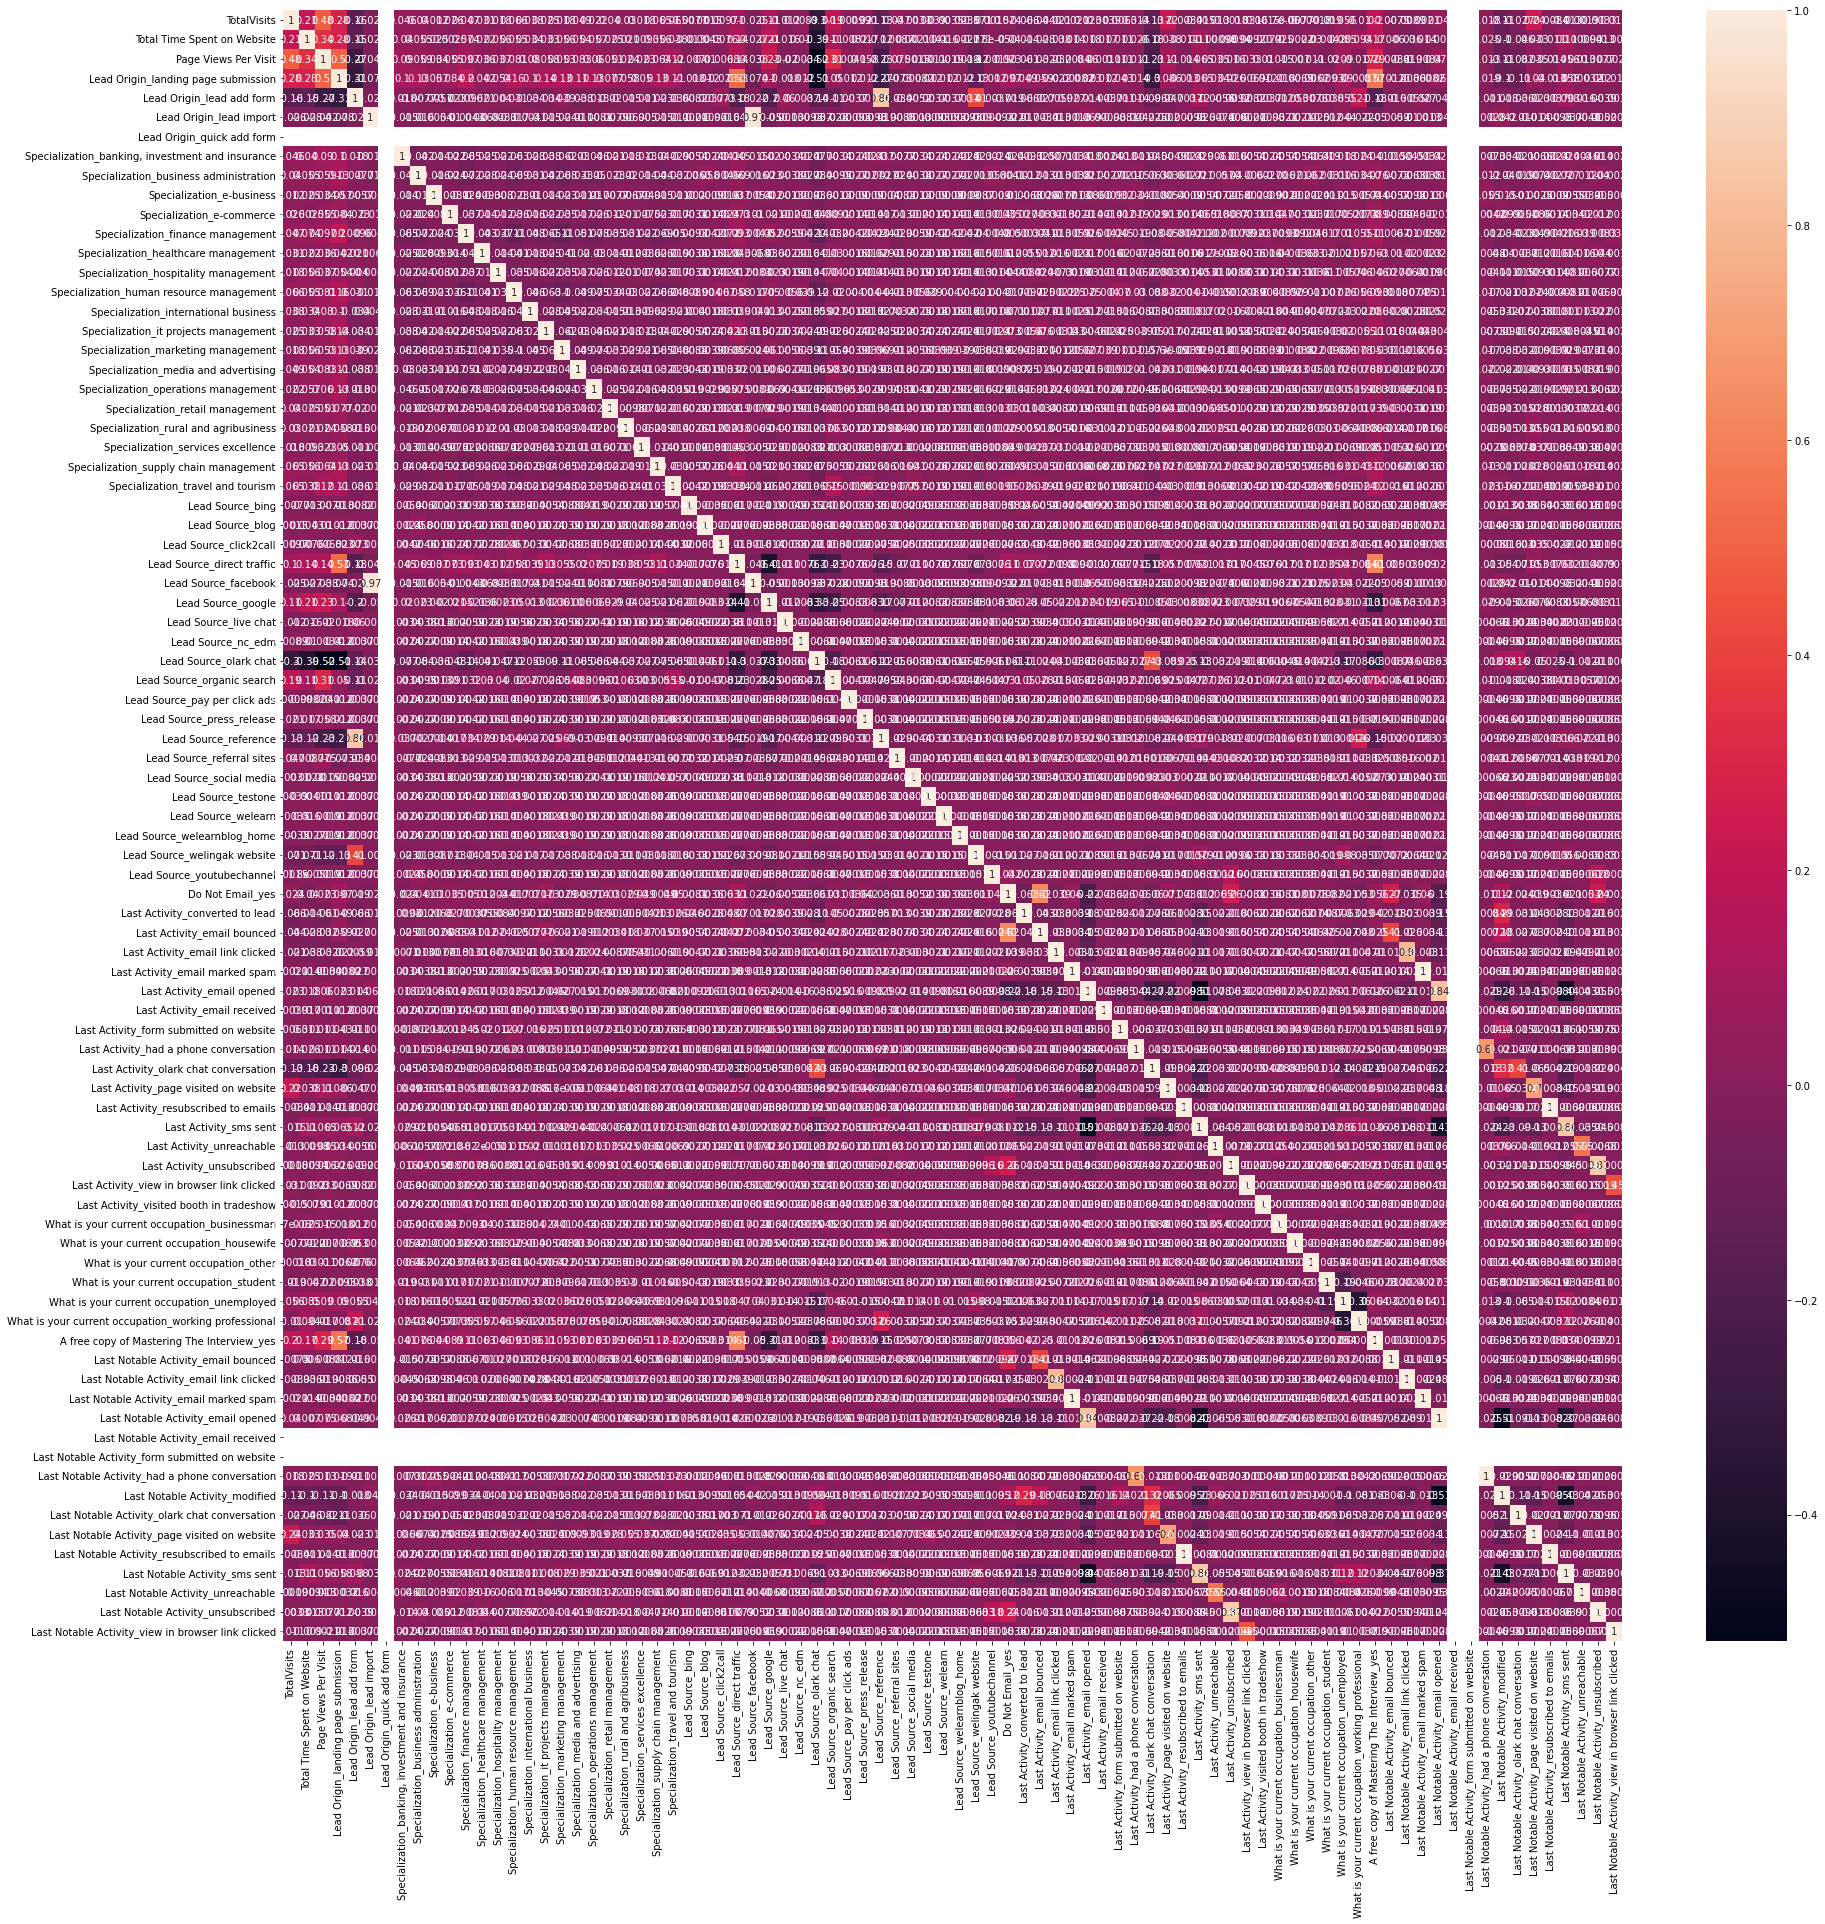

In [59]:
#plotting the correlations
plt.figure(figsize=(30,30))
sns.heatmap(X_train.corr(),annot= True)
plt.show()

As we can see there are too many features to drop one, so we will be doing RFE.

### Model Building:

In [60]:
LR = LogisticRegression()

In [61]:
#selecting 15features using RFE
rfe = RFE(LR , n_features_to_select = 15)
rfe = rfe.fit(X_train,y_train)

In [62]:
list(zip(X_train.columns , rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 4),
 ('Lead Origin_landing page submission', False, 17),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 54),
 ('Lead Origin_quick add form', False, 68),
 ('Specialization_banking, investment and insurance', False, 23),
 ('Specialization_business administration', False, 28),
 ('Specialization_e-business', False, 19),
 ('Specialization_e-commerce', False, 27),
 ('Specialization_finance management', False, 25),
 ('Specialization_healthcare management', False, 16),
 ('Specialization_hospitality management', False, 40),
 ('Specialization_human resource management', False, 22),
 ('Specialization_international business', False, 32),
 ('Specialization_it projects management', False, 24),
 ('Specialization_marketing management', False, 20),
 ('Specialization_media and advertising', False, 31),
 ('Specialization_operations management', False, 26),
 ('Specialization

In [63]:
#putting RFE support features in col variable
col = X_train.columns[rfe.support_]

In [64]:
X_train.columns[~rfe.support_]

Index(['Page Views Per Visit', 'Lead Origin_landing page submission',
       'Lead Origin_lead import', 'Lead Origin_quick add form',
       'Specialization_banking, investment and insurance',
       'Specialization_business administration', 'Specialization_e-business',
       'Specialization_e-commerce', 'Specialization_finance management',
       'Specialization_healthcare management',
       'Specialization_hospitality management',
       'Specialization_human resource management',
       'Specialization_international business',
       'Specialization_it projects management',
       'Specialization_marketing management',
       'Specialization_media and advertising',
       'Specialization_operations management',
       'Specialization_retail management',
       'Specialization_rural and agribusiness',
       'Specialization_services excellence',
       'Specialization_supply chain management',
       'Specialization_travel and tourism', 'Lead Source_bing',
       'Lead Source_blog'

In [65]:
X_train = X_train[col]

In [66]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2641.6
Date:                Mon, 17 Oct 2022   Deviance:                       5283.2
Time:                        23:46:19   Pearson chi2:                 6.84e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.5496      0.113    -31.328      0.000      -3.772      -3.328
TotalVisits                                              6.2605      2.063      3.035      0.002       2.217      10.304
Total Time Spent on Website                              4.5646      0.166     27.568      0.000       4.240       4.889
Lead Origin_lead add form                                3.6428      0.200     18.254      0.000       3.252       4.034
Lead Source_olark chat                                   1.4579      0.111     13.193      0.000       1.241       1.675
Lead Source_welingak website                             2.4534      1.029      2.385      0.017       0.437       4.469
Do Not Email_yes                                        -1.5110      0.166     -9.094      0.000      -1.837      -1.185
Last Activity_olark chat conversation                   -1.1523      0.159     -7.243      0.000      -1.464      -0.841
Last Activity_sms sent                                   1.3702      0.075     18.356      0.000       1.224       1.517
What is your current occupation_businessman              2.2829      1.490      1.532      0.125      -0.637       5.203
What is your current occupation_housewife               22.4697   1.15e+04      0.002      0.998   -2.24e+04    2.25e+04
What is your current occupation_student                  1.4027      0.220      6.373      0.000       0.971       1.834
What is your current occupation_unemployed               1.2705      0.088     14.516      0.000       1.099       1.442
What is your current occupation_working professional     3.7724      0.195     19.346      0.000       3.390       4.155
Last Notable Activity_had a phone conversation           3.2555      1.171      2.781      0.005       0.961       5.550
Last Notable Activity_unreachable                        2.6206      0.695      3.768      0.000       1.258       3.984
========================================================================================================================
"""

In [67]:
# making VIF dataframe for all the features
vif = pd.DataFrame()
vif["Features"]=X_train.columns
vif["VIF"]= [variance_inflation_factor(X_train.values, i) for i in range (X_train.shape[1])]
vif["VIF"]= round(vif["VIF"],2)
vif= vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_unemployed,2.20
1,Total Time Spent on Website,1.93
2,Lead Origin_lead add form,1.51
3,Lead Source_olark chat,1.50
0,TotalVisits,1.49
7,Last Activity_sms sent,1.48
6,Last Activity_olark chat conversation,1.38
12,What is your current occupation_working profes...,1.33
4,Lead Source_welingak website,1.24
5,Do Not Email_yes,1.06



removing last notable activiry had a phone conversation

In [68]:
#removing the column
X_train.drop("Last Notable Activity_had a phone conversation", axis =1 , inplace = True)

In [69]:
#refitting the model
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2647.5
Date:                Mon, 17 Oct 2022   Deviance:                       5295.0
Time:                        23:46:19   Pearson chi2:                 6.84e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.5415      0.113    -31.289      0.000      -3.763      -3.320
TotalVisits                                              6.3981      2.070      3.091      0.002       2.341      10.455
Total Time Spent on Website                              4.5589      0.165     27.578      0.000       4.235       4.883
Lead Origin_lead add form                                3.6368      0.200     18.228      0.000       3.246       4.028
Lead Source_olark chat                                   1.4525      0.110     13.153      0.000       1.236       1.669
Lead Source_welingak website                             2.4537      1.029      2.385      0.017       0.438       4.470
Do Not Email_yes                                        -1.5154      0.166     -9.126      0.000      -1.841      -1.190
Last Activity_olark chat conversation                   -1.1575      0.159     -7.278      0.000      -1.469      -0.846
Last Activity_sms sent                                   1.3619      0.075     18.269      0.000       1.216       1.508
What is your current occupation_businessman              2.2810      1.492      1.529      0.126      -0.643       5.205
What is your current occupation_housewife               22.4633   1.15e+04      0.002      0.998   -2.24e+04    2.25e+04
What is your current occupation_student                  1.3981      0.220      6.355      0.000       0.967       1.829
What is your current occupation_unemployed               1.2720      0.087     14.545      0.000       1.101       1.443
What is your current occupation_working professional     3.7677      0.195     19.333      0.000       3.386       4.150
Last Notable Activity_unreachable                        2.6113      0.695      3.755      0.000       1.248       3.974
========================================================================================================================
"""

In [70]:
#making VIF dataframe again
vif = pd.DataFrame()
vif["Features"]=X_train.columns
vif["VIF"]= [variance_inflation_factor(X_train.values, i) for i in range (X_train.shape[1])]
vif["VIF"]= round(vif["VIF"],2)
vif= vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_unemployed,2.20
1,Total Time Spent on Website,1.92
2,Lead Origin_lead add form,1.51
3,Lead Source_olark chat,1.50
0,TotalVisits,1.49
7,Last Activity_sms sent,1.48
6,Last Activity_olark chat conversation,1.38
12,What is your current occupation_working profes...,1.33
4,Lead Source_welingak website,1.24
5,Do Not Email_yes,1.06


In [71]:
#dropping the variable
X_train.drop("What is your current occupation_housewife", axis =1 , inplace = True)

In [72]:
#refitting the model
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2653.0
Date:                Mon, 17 Oct 2022   Deviance:                       5306.0
Time:                        23:46:19   Pearson chi2:                 6.87e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.5192      0.113    -31.277      0.000      -3.740      -3.299
TotalVisits                                              6.3504      2.066      3.074      0.002       2.301      10.400
Total Time Spent on Website                              4.5562      0.165     27.590      0.000       4.233       4.880
Lead Origin_lead add form                                3.6727      0.200     18.409      0.000       3.282       4.064
Lead Source_olark chat                                   1.4458      0.110     13.113      0.000       1.230       1.662
Lead Source_welingak website                             2.4177      1.029      2.350      0.019       0.402       4.434
Do Not Email_yes                                        -1.5206      0.166     -9.153      0.000      -1.846      -1.195
Last Activity_olark chat conversation                   -1.1617      0.159     -7.309      0.000      -1.473      -0.850
Last Activity_sms sent                                   1.3557      0.074     18.206      0.000       1.210       1.502
What is your current occupation_businessman              2.2589      1.496      1.510      0.131      -0.673       5.191
What is your current occupation_student                  1.3783      0.220      6.269      0.000       0.947       1.809
What is your current occupation_unemployed               1.2534      0.087     14.421      0.000       1.083       1.424
What is your current occupation_working professional     3.7480      0.195     19.257      0.000       3.367       4.129
Last Notable Activity_unreachable                        2.6023      0.695      3.744      0.000       1.240       3.964
========================================================================================================================
"""

In [73]:
# making the VIF dataframe
vif = pd.DataFrame()
vif["Features"]=X_train.columns
vif["VIF"]= [variance_inflation_factor(X_train.values, i) for i in range (X_train.shape[1])]
vif["VIF"]= round(vif["VIF"],2)
vif= vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_unemployed,2.20
1,Total Time Spent on Website,1.92
2,Lead Origin_lead add form,1.50
3,Lead Source_olark chat,1.50
0,TotalVisits,1.49
7,Last Activity_sms sent,1.48
6,Last Activity_olark chat conversation,1.38
11,What is your current occupation_working profes...,1.33
4,Lead Source_welingak website,1.24
5,Do Not Email_yes,1.06


In [74]:
#dropping another variable
X_train.drop("What is your current occupation_businessman", axis =1 , inplace = True)

In [75]:
#refitting the model
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2654.5
Date:                Mon, 17 Oct 2022   Deviance:                       5309.0
Time:                        23:46:20   Pearson chi2:                 6.89e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.5129      0.112    -31.282      0.000      -3.733      -3.293
TotalVisits                                              6.3711      2.067      3.082      0.002       2.320      10.422
Total Time Spent on Website                              4.5634      0.165     27.651      0.000       4.240       4.887
Lead Origin_lead add form                                3.6883      0.200     18.473      0.000       3.297       4.080
Lead Source_olark chat                                   1.4468      0.110     13.125      0.000       1.231       1.663
Lead Source_welingak website                             2.4054      1.029      2.338      0.019       0.389       4.422
Do Not Email_yes                                        -1.5233      0.166     -9.165      0.000      -1.849      -1.198
Last Activity_olark chat conversation                   -1.1591      0.159     -7.297      0.000      -1.470      -0.848
Last Activity_sms sent                                   1.3536      0.074     18.182      0.000       1.208       1.500
What is your current occupation_student                  1.3693      0.220      6.229      0.000       0.938       1.800
What is your current occupation_unemployed               1.2448      0.087     14.371      0.000       1.075       1.415
What is your current occupation_working professional     3.7395      0.195     19.224      0.000       3.358       4.121
Last Notable Activity_unreachable                        2.6363      0.688      3.834      0.000       1.289       3.984
========================================================================================================================
"""

In [76]:
#making the VIF datframe
vif = pd.DataFrame()
vif["Features"]=X_train.columns
vif["VIF"]= [variance_inflation_factor(X_train.values, i) for i in range (X_train.shape[1])]
vif["VIF"]= round(vif["VIF"],2)
vif= vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_unemployed,2.19
1,Total Time Spent on Website,1.92
2,Lead Origin_lead add form,1.50
3,Lead Source_olark chat,1.50
0,TotalVisits,1.49
7,Last Activity_sms sent,1.48
6,Last Activity_olark chat conversation,1.38
10,What is your current occupation_working profes...,1.33
4,Lead Source_welingak website,1.24
5,Do Not Email_yes,1.06


- This model seems good as VIF s are goodn and P values are also less than 0.05

### Creating Prediction

In [77]:
#predicting the probabilities on the train dataset
y_train_pred= res.predict(X_train_sm)
y_train_pred

Lead Number
630013    0.200556
585643    0.909987
631406    0.984459
660458    0.546663
633361    0.459994
            ...   
613679    0.037897
593498    0.330572
645755    0.305479
593476    0.406117
646334    0.646152
Length: 6468, dtype: float64

In [78]:
# reshaping this to an array
y_train_pred=y_train_pred.values.reshape(-1)
y_train_pred

array([0.20055635, 0.90998654, 0.98445922, ..., 0.30547912, 0.40611742,
       0.646152  ])

In [79]:
#creating Dataframe of conversion rate and probabilities of predicted values
y_train_pred1 = pd.DataFrame({"Converted": y_train.values, "Conversion_Prob": y_train_pred})
y_train_pred1.head()

,Converted,Conversion_Prob
0,0,0.200556
1,1,0.909987
2,1,0.984459
3,1,0.546663
4,0,0.459994


In [80]:
#substituting 0 and 1 with a cutoff os 0.5
y_train_pred1["Predicted"] = y_train_pred1.Conversion_Prob.map(lambda x : 1 if x>0.5 else 0)
y_train_pred1

,Converted,Conversion_Prob,Predicted
0,0,0.200556,0
1,1,0.909987,1
2,1,0.984459,1
3,1,0.546663,1
4,0,0.459994,0
...,...,...,...
6463,0,0.037897,0
6464,1,0.330572,0
6465,1,0.305479,0
6466,0,0.406117,0


### Model Evaluation

In [81]:
#measuring the confusion matrix
confusion = metrics.confusion_matrix(y_train_pred1.Converted, y_train_pred1.Predicted)
confusion

array([[3499,  455],
       [ 746, 1768]], dtype=int64)

In [82]:
#computing accuracy rate
accuracy = metrics.accuracy_score(y_train_pred1.Converted, y_train_pred1.Predicted)
accuracy

0.8143166357452072

In [83]:
TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]

In [84]:
# sensitivity
TP/(TP+FN)

0.7032617342879872

In [85]:
#specificity
TN/(TN+FP)

0.8849266565503288

### Plotting the ROC Curve:


In [86]:
#ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [87]:
fpr,tpr,thresholds = metrics.roc_curve(y_train_pred1.Converted, y_train_pred1.Conversion_Prob, drop_intermediate = False)

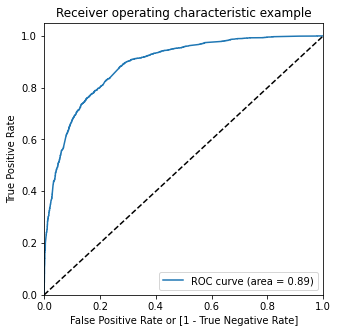

In [88]:
draw_roc(y_train_pred1.Converted, y_train_pred1.Conversion_Prob)

#### The area under ROC curve is 0.88

### Finding the optimal cutoff points

In [89]:
# Let's create columns with different probability cutoffs 
nums = [float(x)/10 for x in range(10)]
for i in nums:
    y_train_pred1[i]= y_train_pred1.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred1.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.200556,0,1,1,1,0,0,0,0,0,0,0
1,1,0.909987,1,1,1,1,1,1,1,1,1,1,1
2,1,0.984459,1,1,1,1,1,1,1,1,1,1,1
3,1,0.546663,1,1,1,1,1,1,1,0,0,0,0
4,0,0.459994,0,1,1,1,1,1,0,0,0,0,0


In [90]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred1.Converted, y_train_pred1[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.388683  1.000000  0.000000
0.1   0.1  0.582560  0.987271  0.325240
0.2   0.2  0.762832  0.913683  0.666920
0.3   0.3  0.788033  0.875099  0.732676
0.4   0.4  0.810142  0.770485  0.835357
0.5   0.5  0.814317  0.703262  0.884927
0.6   0.6  0.804886  0.631663  0.915023
0.7   0.7  0.779994  0.519491  0.945625
0.8   0.8  0.758813  0.430788  0.967375
0.9   0.9  0.714440  0.284407  0.987860


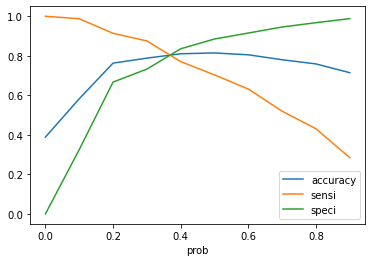

In [91]:
cutoff_df.plot.line(x="prob",y=['accuracy','sensi','speci'])
plt.show()

#### From the graph we can predict the cutoff to be close to 0.35

In [92]:
#making prediction with a new cutoff of 0.35
y_train_pred1["Predicted_final"]= y_train_pred1.Conversion_Prob.map(lambda x : 1 if x>0.35 else 0)

In [93]:
y_train_pred1.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted_final
0,0,0.200556,0,1,1,1,0,0,0,0,0,0,0,0
1,1,0.909987,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.984459,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0.546663,1,1,1,1,1,1,1,0,0,0,0,1
4,0,0.459994,0,1,1,1,1,1,0,0,0,0,0,1


In [94]:
#checking the overall accuracy again
accuracy1 = metrics.accuracy_score(y_train_pred1.Converted, y_train_pred1.Predicted_final)
accuracy1

0.8010204081632653

In [95]:
#creating the confusion matrix
confusion1 = metrics.confusion_matrix(y_train_pred1.Converted, y_train_pred1.Predicted_final)
confusion1

array([[3169,  785],
       [ 502, 2012]], dtype=int64)

In [96]:
# substituting the values of true positive, true negative, false positive, and false negatives
TP=confusion1[1,1]
TN=confusion1[0,0]
FP=confusion1[0,1]
FN=confusion1[1,0]

In [97]:
# sensitivity
TP/(TP+FN)

0.8003182179793158

In [98]:
#specificity
TN/(TN+FP)

0.8014668689934243

### Prediction on Test Set

In [99]:
#scaling the numeric columns
X_test[["TotalVisits", "Page Views Per Visit", "Total Time Spent on Website"]]= Scaler.transform(X_test[["TotalVisits", "Page Views Per Visit", "Total Time Spent on Website"]])

In [100]:
# substituing the columns in the final model
col= X_train.columns

In [101]:
X_test = X_test[col]
X_test_sm = sm.add_constant(X_test[col])
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_lead add form,Lead Source_olark chat,Lead Source_welingak website,Do Not Email_yes,Last Activity_olark chat conversation,Last Activity_sms sent,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,Last Notable Activity_unreachable
Lead Number,,,,,,,,,,,,,
654415,1.0,0.015936,0.147359,0,0,0,0,0,0,0,1,0,0
637416,1.0,0.007968,0.688859,0,0,0,0,0,0,0,1,0,0
644173,1.0,0.011952,0.596538,0,0,0,0,0,0,0,1,0,0
596521,1.0,0.019920,0.083000,0,0,0,0,0,0,0,1,0,0
589639,1.0,0.007968,0.311585,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
580428,1.0,0.007968,0.118065,0,0,0,0,0,1,0,0,0,0
649018,1.0,0.031873,0.703506,0,0,0,0,0,0,0,1,0,0
590171,1.0,0.007968,0.135375,0,0,0,0,0,0,0,1,0,0


In [102]:
y_test_pred = res.predict(X_test_sm)

In [103]:
y_test_pred

Lead Number
654415    0.183308
637416    0.716313
644173    0.629559
596521    0.146489
589639    0.311005
            ...   
580428    0.172248
649018    0.758667
590171    0.168045
600646    0.630012
650506    0.178543
Length: 2772, dtype: float64

In [104]:
# Converting y_pred to a dataframe which is an array
y_pred1_df = pd.DataFrame(y_test_pred)

In [105]:
y_pred1_df.head()

,0
Lead Number,
654415,0.183308
637416,0.716313
644173,0.629559
596521,0.146489
589639,0.311005


In [106]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [107]:
# Remove index for both dataframes to append them side by side 
y_pred1_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)


In [108]:
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred1_df],axis=1)


In [109]:
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.183308
1,0,0.716313
2,0,0.629559
3,0,0.146489
4,0,0.311005


In [110]:
#making prediction with the cutoff of 0.35
y_pred_final["Predicted_final"]= y_pred_final.Conversion_Prob.map(lambda x : 1 if x>0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,Predicted_final
0,0,0.183308,0
1,0,0.716313,1
2,0,0.629559,1
3,0,0.146489,0
4,0,0.311005,0
...,...,...,...
2767,0,0.172248,0
2768,0,0.758667,1
2769,0,0.168045,0
2770,0,0.630012,1


In [111]:
#calculating accuracy
accuracy2 = metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Predicted_final)
accuracy2

0.8080808080808081

In [112]:
#confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Predicted_final)
confusion2

array([[1400,  325],
       [ 207,  840]], dtype=int64)

In [113]:
TP=confusion2[1,1]
TN=confusion2[0,0]
FP=confusion2[0,1]
FN=confusion2[1,0]

In [114]:
# sensitivity
TP/(TP+FN)

0.8022922636103151

In [115]:
#specificity
TN/(TN+FP)

0.8115942028985508

### Precision and Recall

In [116]:
confusion3 = metrics.confusion_matrix(y_train_pred1.Converted, y_train_pred1.Predicted_final) 
confusion3

array([[3169,  785],
       [ 502, 2012]], dtype=int64)

In [117]:
# Precision = TP / TP + FP
confusion3[1,1]/(confusion3[0,1]+confusion3[1,1])

0.7193421523060421

In [118]:
# Recall= TP / TP + FN
confusion3[1,1]/(confusion3[1,0]+confusion3[1,1])

0.8003182179793158

### Precision and Recall tradeoff

In [119]:
from sklearn.metrics import precision_recall_curve

In [120]:
y_train_pred1.Converted , y_train_pred1.Predicted_final

(0       0
 1       1
 2       1
 3       1
 4       0
        ..
 6463    0
 6464    1
 6465    1
 6466    0
 6467    1
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       1
 2       1
 3       1
 4       1
        ..
 6463    0
 6464    0
 6465    0
 6466    1
 6467    1
 Name: Predicted_final, Length: 6468, dtype: int64)

In [121]:
p,r, thresholds = precision_recall_curve(y_train_pred1.Converted , y_train_pred1.Conversion_Prob)

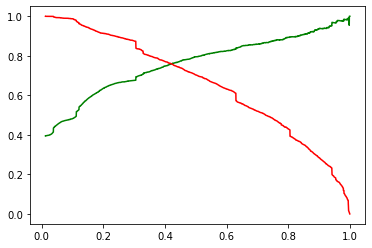

In [122]:
plt.plot(thresholds, p[:-1],"g-")
plt.plot(thresholds, r[:-1],"r-")
plt.show()


In [123]:
y_train_pred1["Predicted_final"]= y_train_pred1.Conversion_Prob.map(lambda x : 1 if x>0.41 else 0)
y_train_pred1

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted_final
0,0,0.200556,0,1,1,1,0,0,0,0,0,0,0,0
1,1,0.909987,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.984459,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0.546663,1,1,1,1,1,1,1,0,0,0,0,1
4,0,0.459994,0,1,1,1,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6463,0,0.037897,0,1,0,0,0,0,0,0,0,0,0,0
6464,1,0.330572,0,1,1,1,1,0,0,0,0,0,0,0
6465,1,0.305479,0,1,1,1,1,0,0,0,0,0,0,0
6466,0,0.406117,0,1,1,1,1,1,0,0,0,0,0,0


In [124]:
#accuracy
accuracy = metrics.accuracy_score(y_train_pred1.Converted, y_train_pred1.Predicted_final)
accuracy

0.8106060606060606

In [125]:
#confusion matrix
confusion = metrics.confusion_matrix(y_train_pred1.Converted, y_train_pred1.Predicted_final)
confusion

array([[3319,  635],
       [ 590, 1924]], dtype=int64)

In [126]:
TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]

In [127]:
# Precision
TP/(TP+FP)

0.7518561938257131

In [128]:
#Recall
TP/(TP+FN)

0.7653142402545744

### Final Predicton On the test set

In [129]:
y_test_pred = res.predict(X_test_sm)
y_test_pred

Lead Number
654415    0.183308
637416    0.716313
644173    0.629559
596521    0.146489
589639    0.311005
            ...   
580428    0.172248
649018    0.758667
590171    0.168045
600646    0.630012
650506    0.178543
Length: 2772, dtype: float64

In [130]:
# Converting y_pred to a dataframe which is an array
y_pred1_df = pd.DataFrame(y_test_pred)
y_pred1_df

,0
Lead Number,
654415,0.183308
637416,0.716313
644173,0.629559
596521,0.146489
589639,0.311005
...,...
580428,0.172248
649018,0.758667
590171,0.168045


In [131]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [132]:
# Remove index for both dataframes to append them side by side 
y_pred1_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)


In [133]:
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred1_df],axis=1)


In [134]:
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.183308
1,0,0.716313
2,0,0.629559
3,0,0.146489
4,0,0.311005


In [135]:
#making prediction using a cutoff of 0.41
y_pred_final["Predicted_final"]= y_pred_final.Conversion_Prob.map(lambda x : 1 if x>0.41 else 0)
y_pred_final

,Converted,Conversion_Prob,Predicted_final
0,0,0.183308,0
1,0,0.716313,1
2,0,0.629559,1
3,0,0.146489,0
4,0,0.311005,0
...,...,...,...
2767,0,0.172248,0
2768,0,0.758667,1
2769,0,0.168045,0
2770,0,0.630012,1


In [136]:
#final accuracy
accuracy = metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Predicted_final)
accuracy

0.8113275613275613

In [137]:
#confusion matrix
confusion = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Predicted_final)
confusion

array([[1450,  275],
       [ 248,  799]], dtype=int64)

In [138]:
TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]

In [139]:
# Precision
TP/(TP+FP)

0.7439478584729982

In [140]:
#Recall
TP/(TP+FN)

0.7631327602674307

#### With the current cutoff of 0.41, 
- Precision = 0.74
- Recall = 0.76

### Conclusion

Based on the above model we can say,
- The total Time spent on website
- Total Visits
- when the lead source was 
  - google
  - direct traffic
  - organic search
- when the last activity was
  - sms
  - olark chat conversation
- when their current occupation is a working professional

X education company should focus on these indicators to achieve their business goals.